# Taller 1

MINE-4101: Ciencia de Datos Aplicada
Univerisidad de los Andes  
  
**Dataset:** Hotel Bookings

**Estudiantes:**
- Daniela Camacho Molano
- Laura Ruales


### **0. Importe de Librerias**

In [72]:
%pip install numpy 
%pip install pandas 
%pip install matplotlib 
%pip install seaborn 
%pip install --upgrade ydata-profiling

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
# Importación de librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from ydata_profiling import ProfileReport

In [74]:
# Configuración de pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

pd.options.display.float_format = '{:.2f}'.format

### **1. Entendimiento de Datos**

In [75]:
# Cargarndo el conjunto de datos
reservas = pd.read_csv('./data/hotel_bookings_modified.csv')

C:\Users\d.camachom\AppData\Local\Temp\ipykernel_1444\1867918676.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  reservas = pd.read_csv('./data/hotel_bookings_modified.csv')


In [76]:
# Dimensiones del Dataframe
print("Número de filas y columnas:")
print(reservas.shape)

# Tipos de datos de las columnas
print("Tipos de datos de las columnas:")
print(reservas.dtypes)

# Top 5 filas del dataframe
print("Top 5 filas del dataframe:")
reservas.head(5)

Número de filas y columnas:
(58895, 33)
Tipos de datos de las columnas:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
depo

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.00,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0.00,Transient,0.00,0.00,0.00,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015.00,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0.00,Transient,0.00,0.00,0.00,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015.00,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0.00,Transient,75.00,0.00,0.00,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015.00,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,NaN,0.00,Transient,75.00,0.00,0.00,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015.00,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,NaN,0.00,Transient,98.00,0.00,1.00,Check-Out,2015-07-03,NaN


Dado el dataset, y el problema planteado la variable objetivo es "is_canceled", bajo esta variable se identificarán patrones y la influencia de caracteristicas para entender la probabilidad de cancelación.

#TODO: falta evaluar la duración de la reserva.

#### **Exploración Variables Categoricas**

In [77]:
categorial_columns = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']
total = reservas.shape[0]
print(total)
for column in categorial_columns:
    frecuencias = reservas[column].value_counts()
    schema ={'Categoria': frecuencias.index,
         'Valor': frecuencias.values}
    
    df = pd.DataFrame(schema)
    
    df['Proporcion'] = df['Valor']/total
    print('Nombre atributo: ', column)
    print(df)
    print("-----------------------------------")

58895
Nombre atributo:  hotel
      Categoria  Valor  Proporcion
0  Resort Hotel  40063        0.68
1    City Hotel  18832        0.32
-----------------------------------
Nombre atributo:  arrival_date_month
    Categoria  Valor  Proporcion
0      August   7715        0.13
1   September   6712        0.11
2        July   6177        0.10
3     October   6040        0.10
4         May   5283        0.09
5       April   5185        0.09
6        June   4725        0.08
7       March   4492        0.08
8    February   3830        0.07
9    December   3121        0.05
10   November   2857        0.05
11    January   2758        0.05
-----------------------------------
Nombre atributo:  meal
   Categoria  Valor  Proporcion
0         BB  45060        0.77
1         HB  10096        0.17
2         SC   1780        0.03
3  Undefined   1169        0.02
4         FB    790        0.01
-----------------------------------
Nombre atributo:  country
    Categoria  Valor  Proporcion
0         PRT  27

A continuación se va a realizar gráficas con algunas variables categoricas que dado el contexto del problema y el dataset, pueden estar relacionadas con la cancelación de una reserva. Esto es para entender si existen patrones dentro de las cancelaciones.

C:\Users\d.camachom\AppData\Local\Temp\ipykernel_1444\3624959801.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancelaciones, x='customer_type', y='is_canceled', palette='Set2')


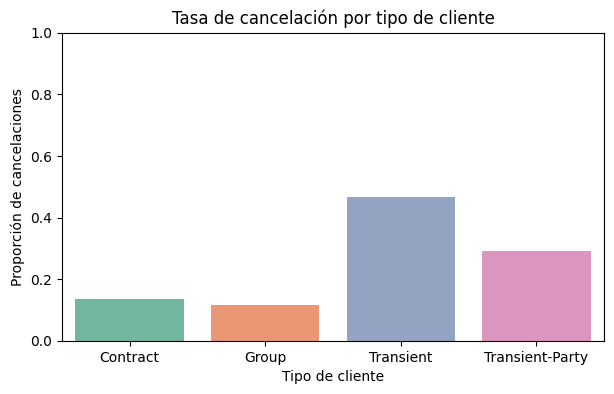

In [78]:
# Calcular la tasa de cancelación por tipo de cliente
cancelaciones = reservas.groupby('customer_type')['is_canceled'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=cancelaciones, x='customer_type', y='is_canceled', palette='Set2')
plt.title('Tasa de cancelación por tipo de cliente')
plt.xlabel('Tipo de cliente')
plt.ylabel('Proporción de cancelaciones')
plt.ylim(0, 1)
plt.show()

C:\Users\d.camachom\AppData\Local\Temp\ipykernel_1444\970360770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancelaciones, x='deposit_type', y='is_canceled', palette='Set2')


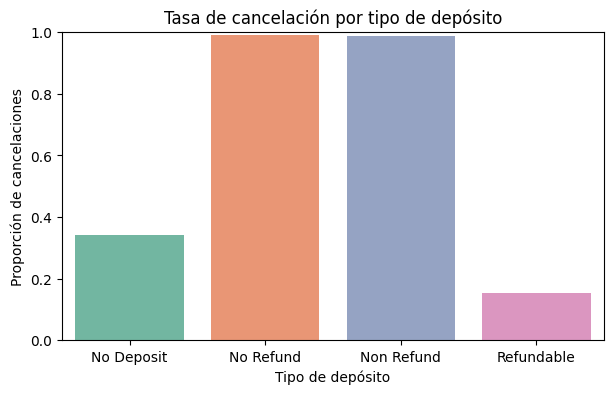

In [79]:

# Calcular la tasa de cancelación por tipo de deposito
cancelaciones = reservas.groupby('deposit_type')['is_canceled'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=cancelaciones, x='deposit_type', y='is_canceled', palette='Set2')
plt.title('Tasa de cancelación por tipo de depósito')
plt.xlabel('Tipo de depósito')
plt.ylabel('Proporción de cancelaciones')
plt.ylim(0, 1)
plt.show()

C:\Users\d.camachom\AppData\Local\Temp\ipykernel_1444\2237752590.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=proporcion_cancelaciones, x='distribution_channel', y='is_canceled', palette='Set2')


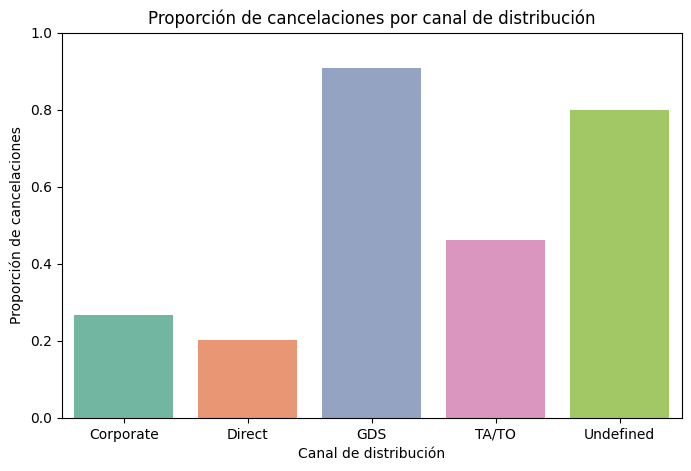

In [80]:
# Calcular la proporción de cancelaciones por canal de distribución
proporcion_cancelaciones = reservas.groupby('distribution_channel')['is_canceled'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=proporcion_cancelaciones, x='distribution_channel', y='is_canceled', palette='Set2')
plt.title('Proporción de cancelaciones por canal de distribución')
plt.xlabel('Canal de distribución')
plt.ylabel('Proporción de cancelaciones')
plt.ylim(0, 1)
plt.show()

C:\Users\d.camachom\AppData\Local\Temp\ipykernel_1444\421335609.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conteo_status, x='reservation_status', y='proporcion', palette='Set2')


(0.0, 1.0)

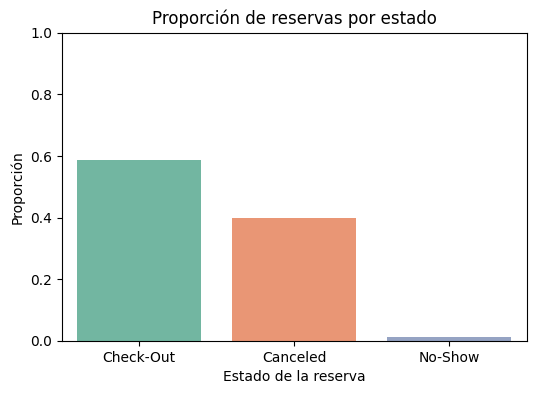

In [81]:
# Calcular la proporción de reservas por estado de reserva
conteo_status = reservas['reservation_status'].value_counts(normalize=True).reset_index()
conteo_status.columns = ['reservation_status', 'proporcion']

plt.figure(figsize=(6,4))
sns.barplot(data=conteo_status, x='reservation_status', y='proporcion', palette='Set2')
plt.title('Proporción de reservas por estado')
plt.xlabel('Estado de la reserva')
plt.ylabel('Proporción')
plt.ylim(0, 1)

C:\Users\d.camachom\AppData\Local\Temp\ipykernel_1444\19062253.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=proporcion_cancelaciones_meal, x='meal', y='is_canceled', palette='Set2')


Text(0, 0.5, 'Proporción de cancelaciones')

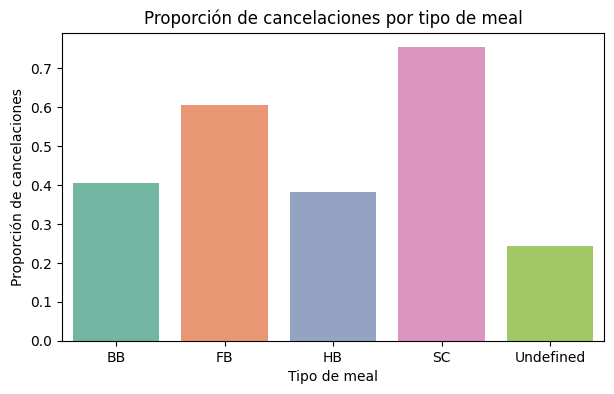

In [82]:
# Calcular la proporción de cancelaciones por tipo de meal
proporcion_cancelaciones_meal = reservas.groupby('meal')['is_canceled'].mean().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=proporcion_cancelaciones_meal, x='meal', y='is_canceled', palette='Set2')
plt.title('Proporción de cancelaciones por tipo de meal')
plt.xlabel('Tipo de meal')
plt.ylabel('Proporción de cancelaciones')

deberiamos sumar canceled con no show?

#### **Exploración Variables Numericas**

In [83]:
reservas[['lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']].describe(include='all')

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,58895.00,58307.00,58895,58895.00,58895.00,58895.00,58895.00,58895.00,58891.00,58895.00,58895.00,58894.00,58306.00,58894.00
unique,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,7715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,100.05,2205.52,NaN,27.84,15.77,1.06,2.85,1.97,0.11,0.14,0.24,3.53,0.10,0.51
std,101.16,1837.39,NaN,13.35,8.78,1.09,2.24,2.94,0.42,3.12,0.70,21.84,0.30,0.77
min,0.00,2015.00,NaN,1.00,1.00,0.00,0.00,-1.00,0.00,-1.00,0.00,0.00,0.00,0.00
25%,17.00,2016.00,NaN,17.00,8.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,69.00,2016.00,NaN,29.00,16.00,1.00,2.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,157.00,2016.00,NaN,38.00,23.00,2.00,4.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00


A partir de las variables númericas identificadas, se va a realizar ciertas graficas para entender su relación con la cancelación de una reserva.

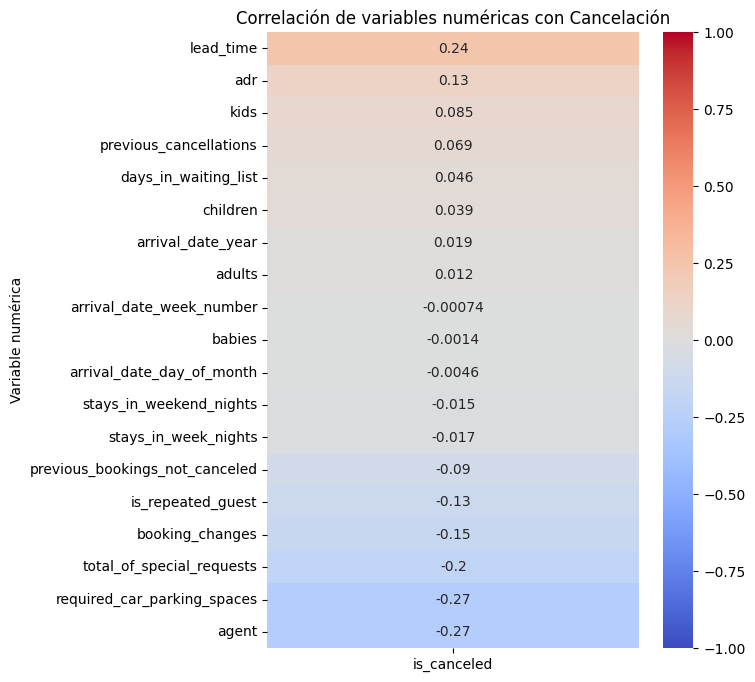

In [84]:
# Seleccionar solo las variables numéricas y la columna is_canceled
numericas = reservas.select_dtypes(include='number')

# Calcular la correlación con is_canceled
correlaciones = numericas.corr()['is_canceled'].sort_values(ascending=False)

# Mostrar solo las correlaciones (excluyendo is_canceled consigo misma)
correlaciones = correlaciones.drop('is_canceled')

plt.figure(figsize=(6,8))
sns.heatmap(correlaciones.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación de variables numéricas con Cancelación')
plt.ylabel('Variable numérica')
plt.show()

Esta grafica permite identificar cuales son aquellas variables con mayor correlación con la cancelación de una reserva. De esta se puede identificar que una variable relevante es "lead_time", esta indica el número de dias transcurridos desde el dia que se realizo la reserva y la fecha de llegada del huesped.

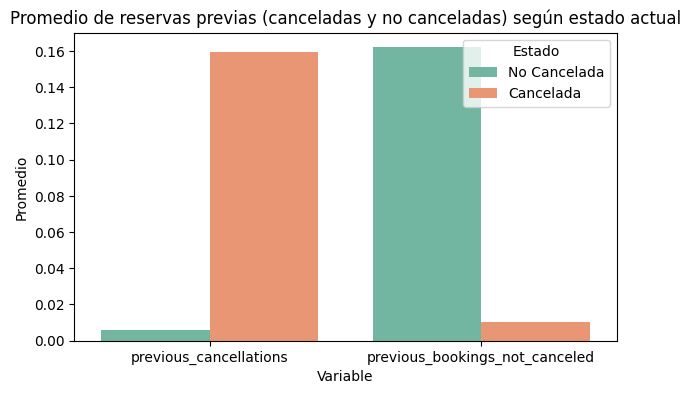

In [85]:
# Agrupar por cancelación y calcular el promedio de ambas variables
promedios = reservas.groupby('is_canceled')[['previous_cancellations', 'previous_bookings_not_canceled']].mean().reset_index()
promedios['Estado'] = promedios['is_canceled'].map({0: 'No Cancelada', 1: 'Cancelada'})

# Reorganizar para graficar fácilmente
promedios_melt = promedios.melt(id_vars='Estado', value_vars=['previous_cancellations', 'previous_bookings_not_canceled'],
                                var_name='Variable', value_name='Promedio')

plt.figure(figsize=(7,4))
sns.barplot(data=promedios_melt, x='Variable', y='Promedio', hue='Estado', palette='Set2')
plt.title('Promedio de reservas previas (canceladas y no canceladas) según estado actual')
plt.xlabel('Variable')
plt.ylabel('Promedio')
plt.show()

#### **Conclusión Entendimiento de Datos**

Variables a tomar en cuenta:
- lead_time
- deposit type
- previous cancellations

Para estas variables se va a realizar un análisis univariado con le fin de identificar su comportamiento y distribución.

In [ ]:
#TODO: analisis univariado de las variables relevantes

In [ ]:
#TODO: generación dataset con variables relevantes